In [39]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
# Use the citipy module to determine
from citipy import citipy
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | ouargaye
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | santa barbara
Processing Record 8 of Set 1 | aguimes
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | luohe
Processing Record 11 of Set 1 | farsund
Processing Record 12 of Set 1 | riyadh
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | kamakwie
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | melong
Processing Record 20 of Set 1 | antofagasta
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | dekar
Processing Record 23 of Set 1

City not found. Skipping...
Processing Record 39 of Set 4 | raton
Processing Record 40 of Set 4 | bergen
Processing Record 41 of Set 4 | mahebourg
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | victor harbor
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | warren
Processing Record 46 of Set 4 | china
Processing Record 47 of Set 4 | saleaula
City not found. Skipping...
Processing Record 48 of Set 4 | port elizabeth
Processing Record 49 of Set 4 | tuktoyaktuk
Processing Record 50 of Set 4 | mabaruma
Processing Record 1 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 2 of Set 5 | dunmore town
Processing Record 3 of Set 5 | deputatskiy
Processing Record 4 of Set 5 | kawana waters
City not found. Skipping...
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | caravelas
Processing Record 7 of Set 5 | sao filipe
Processing Record 8 of Set 5 | fortuna
Processing Record 9 of Set 5 | dunedin
Processing

Processing Record 27 of Set 8 | zlobin
Processing Record 28 of Set 8 | borova
Processing Record 29 of Set 8 | cururupu
Processing Record 30 of Set 8 | quetzaltepec
City not found. Skipping...
Processing Record 31 of Set 8 | college
Processing Record 32 of Set 8 | luzhou
Processing Record 33 of Set 8 | coquimbo
Processing Record 34 of Set 8 | macau
Processing Record 35 of Set 8 | cayenne
Processing Record 36 of Set 8 | opuwo
Processing Record 37 of Set 8 | talara
Processing Record 38 of Set 8 | malesici
Processing Record 39 of Set 8 | san carlos
Processing Record 40 of Set 8 | auki
Processing Record 41 of Set 8 | walvis bay
Processing Record 42 of Set 8 | riohacha
Processing Record 43 of Set 8 | asau
Processing Record 44 of Set 8 | alofi
Processing Record 45 of Set 8 | rostaq
City not found. Skipping...
Processing Record 46 of Set 8 | kruisfontein
Processing Record 47 of Set 8 | puri
Processing Record 48 of Set 8 | fairbanks
Processing Record 49 of Set 8 | bossembele
City not found. Ski

Processing Record 15 of Set 12 | ajdabiya
Processing Record 16 of Set 12 | brigantine
Processing Record 17 of Set 12 | abha
Processing Record 18 of Set 12 | nichinan
Processing Record 19 of Set 12 | chara
Processing Record 20 of Set 12 | goure
Processing Record 21 of Set 12 | peniche
Processing Record 22 of Set 12 | oga
Processing Record 23 of Set 12 | lephepe
City not found. Skipping...
Processing Record 24 of Set 12 | turbana
Processing Record 25 of Set 12 | sikandra rao
Processing Record 26 of Set 12 | amapa
Processing Record 27 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 28 of Set 12 | camana
Processing Record 29 of Set 12 | burns lake
Processing Record 30 of Set 12 | coolum beach
Processing Record 31 of Set 12 | qasigiannguit
Processing Record 32 of Set 12 | marsa matruh
Processing Record 33 of Set 12 | port blair
Processing Record 34 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 35 of Set 12 | luhyny
Processing Record 36 of Set 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,55.06,50,20,4.61,AR,2021-11-10 17:56:47
1,Mataura,-46.1927,168.8643,50.90,98,82,2.95,NZ,2021-11-10 18:00:21
2,Castro,-24.7911,-50.0119,73.89,64,62,5.55,BR,2021-11-10 18:00:22
3,Ouargaye,11.5033,0.0572,91.69,27,19,2.10,BF,2021-11-10 18:00:22
4,Albany,42.6001,-73.9662,59.16,41,46,4.00,US,2021-11-10 17:59:46
5,Santa Barbara,34.7333,-120.0343,63.84,45,1,7.29,US,2021-11-10 18:00:23
6,Aguimes,27.9054,-15.4461,66.83,65,20,13.80,ES,2021-11-10 18:00:23
7,New Norfolk,-42.7826,147.0587,47.70,75,81,1.01,AU,2021-11-10 18:00:23
8,Luohe,33.5717,114.0353,48.24,43,0,9.66,CN,2021-11-10 18:00:19
9,Farsund,58.0948,6.8047,49.05,72,56,10.31,NO,2021-11-10 18:00:24


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [20]:
city_data_df = city_data_df[new_column_order]

In [21]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-11-10 17:56:47,-54.8000,-68.3000,55.06,50,20,4.61
1,Mataura,NZ,2021-11-10 18:00:21,-46.1927,168.8643,50.90,98,82,2.95
2,Castro,BR,2021-11-10 18:00:22,-24.7911,-50.0119,73.89,64,62,5.55
3,Ouargaye,BF,2021-11-10 18:00:22,11.5033,0.0572,91.69,27,19,2.10
4,Albany,US,2021-11-10 17:59:46,42.6001,-73.9662,59.16,41,46,4.00
5,Santa Barbara,US,2021-11-10 18:00:23,34.7333,-120.0343,63.84,45,1,7.29
6,Aguimes,ES,2021-11-10 18:00:23,27.9054,-15.4461,66.83,65,20,13.80
7,New Norfolk,AU,2021-11-10 18:00:23,-42.7826,147.0587,47.70,75,81,1.01
8,Luohe,CN,2021-11-10 18:00:19,33.5717,114.0353,48.24,43,0,9.66
9,Farsund,NO,2021-11-10 18:00:24,58.0948,6.8047,49.05,72,56,10.31


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1636568966.9176896

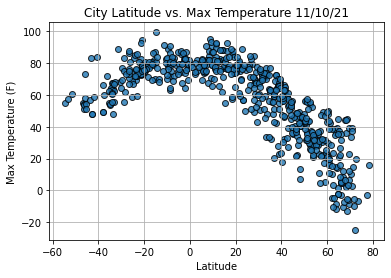

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

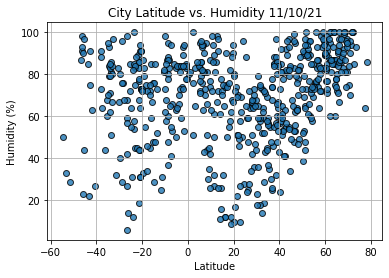

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

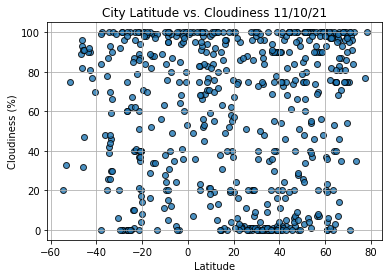

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

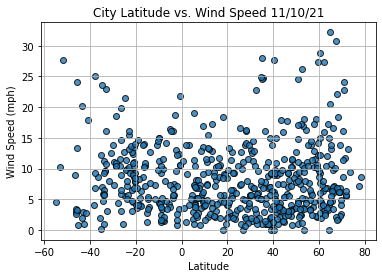

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [41]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

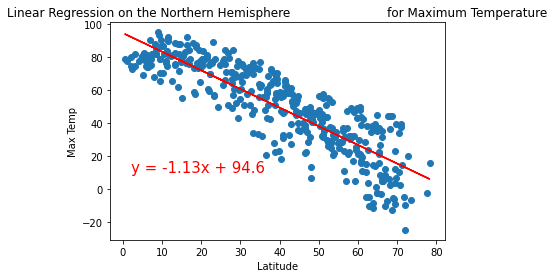

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(2,10))

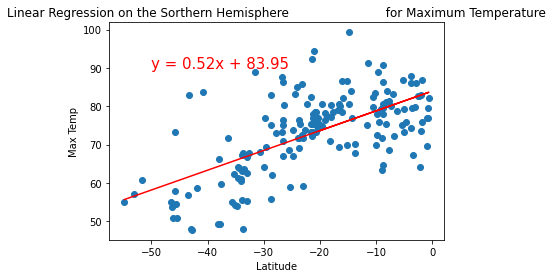

In [51]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Sorthern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

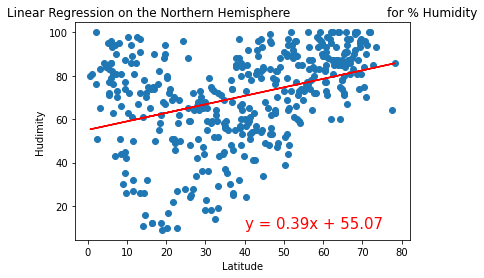

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', 'Hudimity',(40,10))

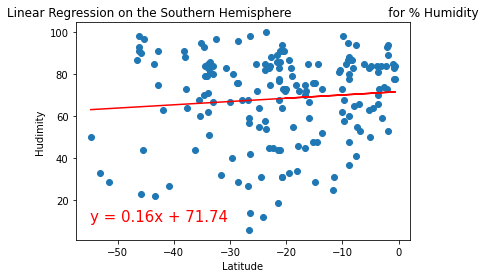

In [58]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', 'Hudimity',(-55,10))

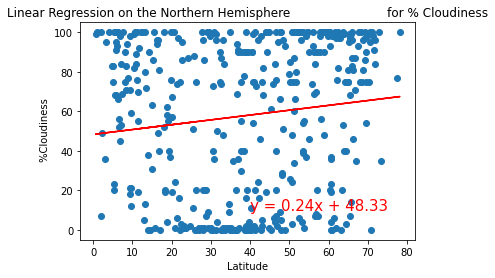

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', ' %Cloudiness',(40,10))

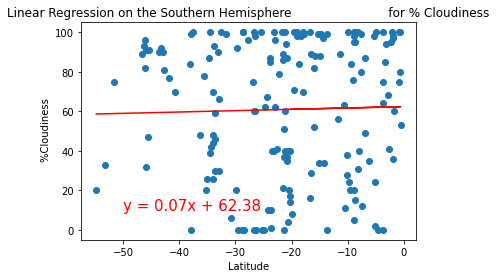

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', ' %Cloudiness',(-50,10))

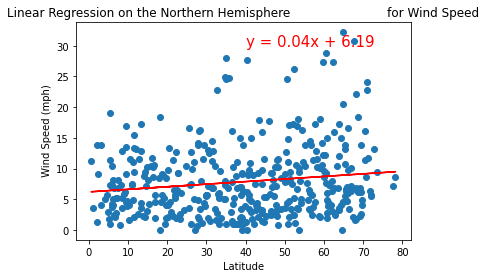

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', ' Wind Speed (mph)',(40,30))

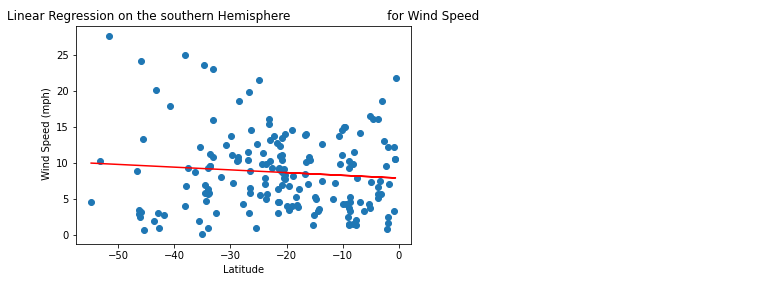

In [66]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \
                        for Wind Speed', ' Wind Speed (mph)',(40,30))